# Analisis terhadap keberhasilan suatu <i> game </i>

Pada kegiatan kali ini, toko daring "Ice" menjual berbagai macam <i>video game</i> dari seluruh dunia. Terdapat data yang mencakup ulasan <i>game</i> yang berasal dari pengguna maupun ahli, platform dari <i>game</i>, serta data histori penjualan <i>game</i>. Kegiatan kali ini bertujuan untuk mengidentifikasi apakah suatu <i>game</i> dapat dikatakan berhasil atau tidak, sehingga bisa menemukan <i>game</i> yang memiliki potensi dan selanjutnya bisa diadakan kampanye iklan.

Beberapa hipotesis yang dapat dikemukakan:
- Tidak terdapat perbedaan rata - rata rating pengguna untuk platform Xbox One dan PC
- Terdapat perbedaan rata - rata rating pengguna genre Action dan Sports

## Pra-pemrosesan

### Pemanggilan library

Pertama dilakukan pemanggilan <i>library</i> yang akan digunakan dalam pengerjaan proyek ini 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

### Pemanggilan dataset

Setelah itu dilakukan pemanggilan <i>dataset</i> yang diperlukan dan pengerjaan proyek ini 

In [2]:
try:
    game = pd.read_csv('/datasets/games.csv')
except:
    game = pd.read_csv('C:/Users/ASUS/games.csv')

### Pengekplorasian data awal

Setelah memanggil data, dilakukan pengekplorasian data pada <i>dataset</i> yang telah dipanggil. <i>dataset</i> `game` memiliki kolom sebagai berikut:
- Name (nama)
- Platform 
- Year_of_Release (tahun rilis)
- Genre 
- NA_sales (penjualan di Amerika Utara dalam satuan juta USD)
- EU_sales (penjualan di Eropa dalam satuan juta USD)
- JP_sales (penjualan di Jepang dalam satuan juta USD)
- Other_sales (penjualan di negara lainnya dalam satuan juta USD)
- Critic_Score (skor ulasan dari kritikus, maksimal 100)
- User_Score (skor ulasan dari pengguna, maksimal 10)
- Rating (ESRB)

In [3]:
#Mengetahui ukuran dataset game
game.shape

(16715, 11)

Terdapat 11 kolom dengan 16.715 baris

In [4]:
#rangkuman umum dari dataset
game.info()
game.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Dari rangkuman akan <i>dataset</i>, judul kolom ditulis dengan penulisan yang kurang konsisten. Hal ini terlihat dari huruf pertama dari masing - masing judul ditulis dengan huruf besar namun pada kata kedua terdapat penulisan yang menggunakan huruf besar dan ada pula yang menulis dengan menggunkan huruf kecil. Untuk menyeragamkan penulisan judul kolom serta memudahkan penulisan dalam pengerjaan analisa ini maka akan diubah judul dari masing - masing kolom menjadikan semuanya huruf kecil.

Selain itu, tipe data dari sebagian kolom juga dapat diubah untuk memudahkan analisa. Kolom dari `Year_of_Release` dapat diubah menjadi datetime atau interger. Namun karena kolom ini hanya memuat tahun saja maka cukup diubah menjadi interger.

In [5]:
#cuplikan dari data
game.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10312,The Penguins of Madagascar: Dr. Blowhole Retur...,X360,2011.0,Action,0.07,0.03,0.00,0.01,NaN,NaN,NaN
840,Carnival Games,DS,2008.0,Misc,1.21,0.63,0.00,0.19,48.0,3.3,E
13558,Hyperdimension Neptunia mk2,PSV,2014.0,Action,0.00,0.00,0.04,0.00,NaN,NaN,NaN
10575,Karaoke Revolution,PS3,2009.0,Misc,0.07,0.02,0.00,0.01,66.0,tbd,T
7466,Defiance,PC,2013.0,Shooter,0.14,0.04,0.00,0.02,64.0,6.5,M


Dari pengambilan data secara acak dapat terlihat bahwa terdapat kolom yang memiliki nilai yang hilang. Dari ringkasan umum mengenai <i>dataset</i> `game` juga terlihat bahwa sebagian besar kolom memiliki nilai yang hilang. Maka perlu diselidiki seberapa banyak nilai yang hilang ini.

In [6]:
#Mengetahui jumlah nilai yang hilang per kolom
game.isnull().sum().sort_values(ascending=False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

In [7]:
#Mengetahui persentase nilai yang hilang per kolom
(game.isnull().sum().sort_values(ascending=False)/game.shape[0]).map('{:,.2%}'.format)

Critic_Score       51.32%
Rating             40.48%
User_Score         40.09%
Year_of_Release     1.61%
Name                0.01%
Genre               0.01%
Platform            0.00%
NA_sales            0.00%
EU_sales            0.00%
JP_sales            0.00%
Other_sales         0.00%
dtype: object

Terdapat 6 dari 11 kolom yang berisi nilai hilang, dengan kolom `Critic_Score` memiliki nilai hilang paling banyak yakni sekitar 51%.

### Analisa akan nilai yang hilang

Untuk mengetahui apakah nilai yang hilang memiliki suatu pola atau tidak, perlu dilakukan analisa akan kolom yang menggandung nilai yang hilang. Pertama, menyelidiki akan nilai yang hilang untuk kolom `Critic_Score`. Akan dibandingkan nilai yang hilang untuk kolom `Critic_Score` pada masing  - masing kategori platform dengan total keseluruhan data masing - masing platform

In [8]:
game[game['Critic_Score'].isnull()]['Platform'].value_counts(normalize=True).map('{:,.2%}'.format)

DS      16.72%
PS      11.62%
PS2     10.06%
PSP      8.71%
Wii      8.57%
PS3      5.96%
GBA      4.48%
3DS      4.10%
X360     4.03%
N64      3.72%
PSV      3.61%
PC       3.02%
SNES     2.79%
SAT      2.02%
PS4      1.63%
2600     1.55%
GC       1.26%
XB       1.15%
GB       1.14%
NES      1.14%
XOne     0.91%
WiiU     0.66%
DC       0.44%
GEN      0.34%
NG       0.14%
SCD      0.07%
WS       0.07%
3DO      0.03%
TG16     0.02%
GG       0.01%
PCFX     0.01%
Name: Platform, dtype: object

In [9]:
game['Platform'].value_counts(normalize=True).map('{:,.2%}'.format)

PS2     12.93%
DS      12.87%
PS3      7.96%
Wii      7.90%
X360     7.55%
PSP      7.23%
PS       7.16%
PC       5.83%
XB       4.93%
GBA      4.92%
GC       3.33%
3DS      3.11%
PSV      2.57%
PS4      2.35%
N64      1.91%
XOne     1.48%
SNES     1.43%
SAT      1.03%
WiiU     0.88%
2600     0.80%
NES      0.59%
GB       0.59%
DC       0.31%
GEN      0.17%
NG       0.07%
SCD      0.04%
WS       0.04%
3DO      0.02%
TG16     0.01%
GG       0.01%
PCFX     0.01%
Name: Platform, dtype: object

Walau dari persebaran terlihat berbeda seperti jumlah kolom yang hilang untuk `Critic_Score` pada DS lebih sedikit dibandingkan dengan sebaran data untuk keseluruhan data yang merupakan platform DS, namun persebaran ini masih terbilang acak atau tidak memiliki pola. Hal ini terlihat bahwa tidak ada data hilang yang mendominasi 

Selanjutnya dilihat untuk nilai yang hilang pada kolom `Rating`

In [10]:
game[game['Rating'].isnull()]['Platform'].value_counts(normalize=True).map('{:,.2%}'.format)

PS      14.62%
DS      12.98%
PS2     10.05%
PSP      9.83%
PS3      5.60%
N64      4.71%
Wii      4.70%
GBA      4.43%
3DS      4.32%
PSV      4.12%
SNES     3.53%
X360     3.10%
PC       2.96%
SAT      2.56%
PS4      2.02%
2600     1.97%
GB       1.45%
NES      1.45%
XB       1.34%
GC       1.29%
XOne     0.90%
WiiU     0.62%
DC       0.56%
GEN      0.43%
NG       0.18%
SCD      0.09%
WS       0.09%
3DO      0.04%
TG16     0.03%
GG       0.01%
PCFX     0.01%
Name: Platform, dtype: object

Dapat terlihat pula bahwa tidak ada suatu pola tertentu yang menyebabkan nilai pada kolom `Rating` hilang. Walaupun terdapat perbedaan distribusi antara nilai yang hilang dengan nilai keseluruhan, namun distribusi ini masih terbilang acak.

Lalu untuk nilai yang hilang pada kolom `User_Score`

In [11]:
game[game['User_Score'].isnull()]['Year_of_Release'].value_counts(normalize=True).map('{:,.2%}'.format)

2010.0    6.92%
2008.0    6.66%
2011.0    6.33%
2009.0    6.16%
2007.0    5.69%
1998.0    5.27%
2006.0    4.99%
1999.0    4.53%
2012.0    4.39%
2015.0    4.10%
1997.0    4.09%
1996.0    3.86%
2005.0    3.56%
2014.0    3.50%
2013.0    3.41%
1995.0    3.31%
2016.0    3.12%
2000.0    3.03%
2002.0    2.62%
2004.0    2.51%
2003.0    2.48%
2001.0    2.16%
1994.0    1.82%
1993.0    0.94%
1981.0    0.70%
1992.0    0.64%
1991.0    0.62%
1982.0    0.54%
1986.0    0.32%
1983.0    0.26%
1989.0    0.26%
1990.0    0.24%
1987.0    0.24%
1988.0    0.21%
1984.0    0.21%
1985.0    0.20%
1980.0    0.14%
Name: Year_of_Release, dtype: object

In [12]:
game['Year_of_Release'].value_counts(normalize=True).map('{:,.2%}'.format)

2008.0    8.68%
2009.0    8.67%
2010.0    7.63%
2007.0    7.28%
2011.0    6.91%
2006.0    6.12%
2005.0    5.71%
2002.0    5.04%
2003.0    4.71%
2004.0    4.63%
2012.0    3.97%
2015.0    3.68%
2014.0    3.53%
2013.0    3.31%
2016.0    3.05%
2001.0    2.93%
1998.0    2.30%
2000.0    2.13%
1999.0    2.06%
1997.0    1.76%
1996.0    1.60%
1995.0    1.33%
1994.0    0.74%
1993.0    0.38%
1981.0    0.28%
1992.0    0.26%
1991.0    0.25%
1982.0    0.22%
1986.0    0.13%
1989.0    0.10%
1983.0    0.10%
1990.0    0.10%
1987.0    0.10%
1988.0    0.09%
1985.0    0.09%
1984.0    0.09%
1980.0    0.05%
Name: Year_of_Release, dtype: object

Pada kolom `User_Score` dengan melihat distribusi antara nilai yang hilang pada pengelompokan secara tahun rilis dengan distribusi keseluruhan dari tahun rilis permainan juga menunjukan bahwa tidak ada suatu pola dari nilai yang hilang pada kolom `User_Score`.

Terakhir untuk kolom `Year_of_Release`

In [13]:
game[game['Year_of_Release'].isnull()]['Platform'].value_counts(normalize=True).map('{:,.2%}'.format)

PS2     12.64%
Wii     12.64%
X360    11.15%
DS      11.15%
PS3      9.29%
XB       7.81%
2600     6.32%
PC       6.32%
PSP      5.95%
GC       5.20%
GBA      4.09%
3DS      2.97%
PS       2.60%
N64      1.12%
GB       0.37%
PSV      0.37%
Name: Platform, dtype: object

Dapat terlihat bahwa nilai yang hilang pada kolom `Year_of_Release` bersifat acak.

### Kesimpulan Sementara

Dari pengeksplorasian data, dapat diperoleh kesimpulan sebagai berikut:
- Judul dari kolom tidak konsisten, karena walaupun kata pertama ditulis dengan huruf besar, namun kata kedua ada yang ditulis dengan huruf besar maupun dengan huruf kecil. Perlu diubah judul kolom menjadi semuanya huruf kecil
- Kolom `Year_of_Release` dapat diubah tipe datanya menjadi interger
- Terdapat 6 dari 11 kolom yang mengandung nilai yang hilang dengan kolom `Critic_Score` memiliki nilai yang hilang sebesar 51%
- Nilai yang hilang pada kolom `Critic_Score`, `Year_of_Release`, `User_Score`, dan `Rating` tidak memiliki suatu pola, yang menjadikan nilai yang hilang ini adalah nilai yang acak.

## Pemrosesan Data

### Perbaikan judul kolom

Pertama diubah judul kolom agar seluruh huruf pada kolom menjadi huruf kecil

In [14]:
game.columns = game.columns.str.lower()
game.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Mengatasi nilai yang hilang & pengubahan tipe data

#### Nilai yang hilang untuk kolom `name` dan `genre`

Pertama akan dianalisa untuk nilai yang hilang pada kolom `name` dan `genre`

In [15]:
game[(game['name'].isnull()) & (game['genre'].isnull())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Pada kolom ini, terlihat bahwa nilai yang hilang pada kolom `Name` dan `Genre` berada pada data yang sama. Kita tidak bisa mengetahui permainan apa yang berada pada nilai yang hilang ini kecuali terdapat narasumber utama penjualan permainan untuk platform tertentu dan rilis pada tahun kapan. Dikarenakan data ini hanya berkontribusi kurang dari 1% dari keseluruhan data maka lebih baik data ini dihapus.

In [16]:
game = game.dropna(subset=['name']).reset_index(drop=True)
game.isnull().sum().sort_values(ascending=False)

critic_score       8576
rating             6764
user_score         6699
year_of_release     269
name                  0
platform              0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

#### Nilai yang hilang dan pengubahan tipe data pada kolom `year_of_release`

Untuk nilai yang hilang pada kolom `year_of_release`, untuk menghindari kerancuan dalam proses analisa berikutnya, nilai yang hilang akan diberi angka 0

In [17]:
game['year_of_release'] = game['year_of_release'].fillna(0)
#Pengecekan apakah masih terdapat nilai yang hilang pada kolom year_of_release
game['year_of_release'].isna().sum()

0

Setelah tidak ada nilai yang hilang pada kolom `year_of_release`, bisa dilakukan pengubahan tipe data

In [18]:
game['year_of_release'] = game['year_of_release'].astype('int64')
game.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

#### Nilai yang hilang pada kolom `critic_score`, `rating`, dan `user_score`

Terdapat kemungkinan mengapa kolom `rating` memiliki nilai yang hilang. Rating untuk permainan yang digunakan pada tabel ini mengacu kepada ESRB. ESRB sendiri baru berdiri pada tahun [1994](https://id.wikipedia.org/wiki/Entertainment_Software_Rating_Board). Sedangkan terdapat permainan yang telah rilis mulai tahun 1980. Selain itu, terdapat juga kemungkinan bahwa permainan tidak memiliki rating dikarenakan faktor kesalahan manusia. Rating ini salah satu faktor penting dan sekitar 51% data memiliki nilai rating yang hilang. Untuk mengurangi kesalahan dalam analisa data serta mengisi nilai yang hilang, nilai yang hilang ini akan diisi dengan 'N/A'

In [19]:
game['rating'].fillna('N/A', inplace = True)
game['rating'].isna().sum()

0

Untuk `critic_score` dan `user_score`, kemungkinan nilai ini hilang dikarenakan faktor kesalahan manusia dalam pengisian nilai atau memang tidak ada penilaian untuk semua permainan, khususnya untuk `critic_score`. Khusus untuk `user_score`, terdapat data yang mengandung nilai "tbd" yang menunjukan nilai ini akan ditentukan kemudian hari. Baik `critic_score` maupun `user_score` adalah paramater yang penting dalam analisa, sehingga perlu diisi. Untuk mengurangi kesalahan dalam analisa namun tetap mengisi nilai yang hilang, akan diisi kedua kolom ini dengan nilai -1

In [20]:
game.loc[game['user_score'] == 'tbd', 'user_score'] = -1
game['user_score'].fillna(-1, inplace=True)
game['critic_score'].fillna(-1, inplace=True)
#Pengecekan untuk memastikan tidak ada nilai yang hilang
game.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### Pengubahan tipe data `critic_score` dan `user_score`

Dilakukan pengecekan untuk mengetahui apa isi dari `critic_score` dan `user_score`

In [21]:
game['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [22]:
game['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Dapat terlihat bahwa `critic_score` berisi angka bulat dan `user_score` berisi desimal namun tipe datanya berupa object. Tipe data dari kedua kolom ini bisa diubah menjadi int dan float

In [23]:
game['critic_score'] = game['critic_score'].astype('int64')
game['user_score'] = game['user_score'].astype('float64')
game.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         int64
user_score         float64
rating              object
dtype: object

### Data yang duplikat

Selanjutnya, akan dipastikan bahwa tidak ada data yang duplikat

In [24]:
game[game.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E
1189,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1590,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
1744,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43,4.1,E10+
4126,Sonic the Hedgehog,PS3,0,Platform,0.00,0.48,0.00,0.00,43,4.1,E10+
5971,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
11714,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,8.5,T
16228,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E


Terdapat 8 data yang kemungkinan merupakan data duplikat. Namun setelah dilakukan riset, Untuk <i>game</i> Need for Speed memang terdapat 2 <i>game</i> dengan nama yang sama namun berbeda tahun rilis. Hal yang sama juga berlaku untuk <i>game</i> Sonic the Hedgehog. Namun yang menjadi masalah adalah <i>game</i> Madden NFL 13 yang merupakan data duplikat, sehingga data ini bisa dihilangkan.

In [25]:
game = game.drop(index=16228).reset_index(drop=True)
game[game.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1189,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1590,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
1744,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43,4.1,E10+
4126,Sonic the Hedgehog,PS3,0,Platform,0.00,0.48,0.00,0.00,43,4.1,E10+
5971,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
11714,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,8.5,T


### Penambahan kolom `total_sales`

Untuk memudahkan analisa, akan ditambahkan kolom `total_sales` yang memuat jumlah dari seluruh penjualan yang ada

In [26]:
game['total_sales'] = game['na_sales'] + game['eu_sales'] + game['jp_sales'] + game['other_sales']
game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,N/A,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,N/A,31.38


Untuk mempermudah pembacaan data, akan dilakukan penatataulangan urutan kolom

In [27]:
new_cols = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'total_sales', 'critic_score', 'user_score', 'rating']
game=game[new_cols]
game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,-1,-1.0,N/A
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,-1,-1.0,N/A


### Kesimpulan sementara

Telah dilakukan pemrosesan data, dengan kegiatan yang telah dilakukan sebagai berikut:
- Mengubah judul kolom menjadi seluruhnya huruf kecil
- Mengatasi nilai yang hilang untuk kolom `name`. `genre`, `rating`, `critic_score`, `user_score`, dan `year_of_release`
- Mengubah tipe data untuk kolom `year_of_release`, `critic_score`, dan `user_score`
- Menghilangkan 1 nilai duplikat
- Menambahkan kolom `total_sales` yang merupakan akumulasi dari keseluruhan penjualan.

## Analisa Data

### Jumlah <i>game</i> dirilis per tahun

Setelah mempersiapkan data agar data dapat diolah, dilakukan analisa akan data. Pertama akan dianalisa jumlah <i>game</i> yang dirilis per tahun

In [28]:
#memilah game yang tidak memiliki year_of_release agar mudah dianalisa
game_new = game[game['year_of_release']> 0]

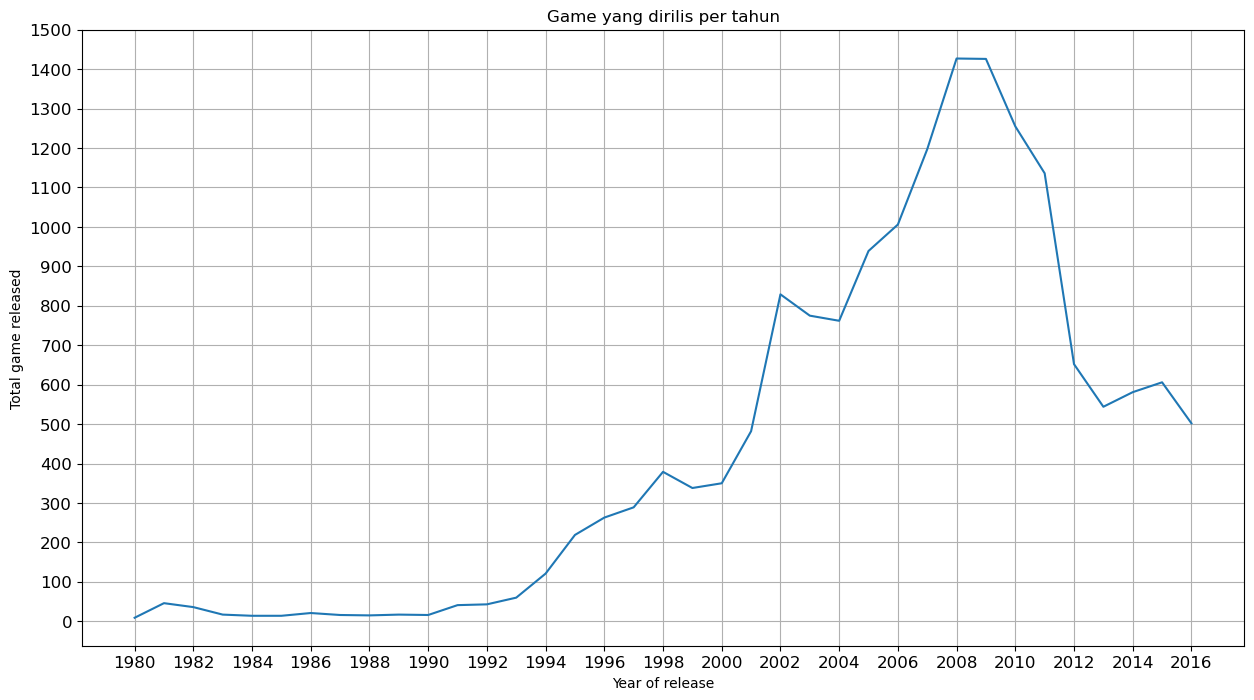

In [29]:
released_per_year = game_new['year_of_release'].value_counts().sort_index(ascending=False)
released_per_year.plot(kind='line', xlabel = 'Year of release', ylabel= 'Total game released',
                       title = 'Game yang dirilis per tahun', grid=True, xticks=range(1980,2018,2),
                       yticks = range(0,1600,100), figsize = (15,8), fontsize = 12)
plt.show()

Dari grafik dapat terlihat bahwa secara garis besar terdapat kenaikan produksi dari jumlah <i>game</i>, namun dari tahun 2009 hingga 2016 terjadi penurunan tren akan penurunan dari jumlah <i>game</i> yang dirilis. Pada tahun 2008 jumlah <i>game</i> yang dirilis sekitar 1500 <i>game</i> sedangkan pada tahun 2016 jumlah <i>game</i> yang dirilis hanya sekitar 600 <i>game</i> saja.

### Distribusi total pendapatan platform per tahun

Selanjutnya akan dilakukan analisa untuk mengelompokan berdasarkan platform. Akan diambil 20 platform yang memiliki total pendapatan terbanyak dan dilihat distribusi nya berdasarkan data pertahun

In [30]:
#mengelompokan game sesuai platform dan menjumlakan total pendapatan
top_platform = game_new.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platform.head(20)

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
Name: total_sales, dtype: float64

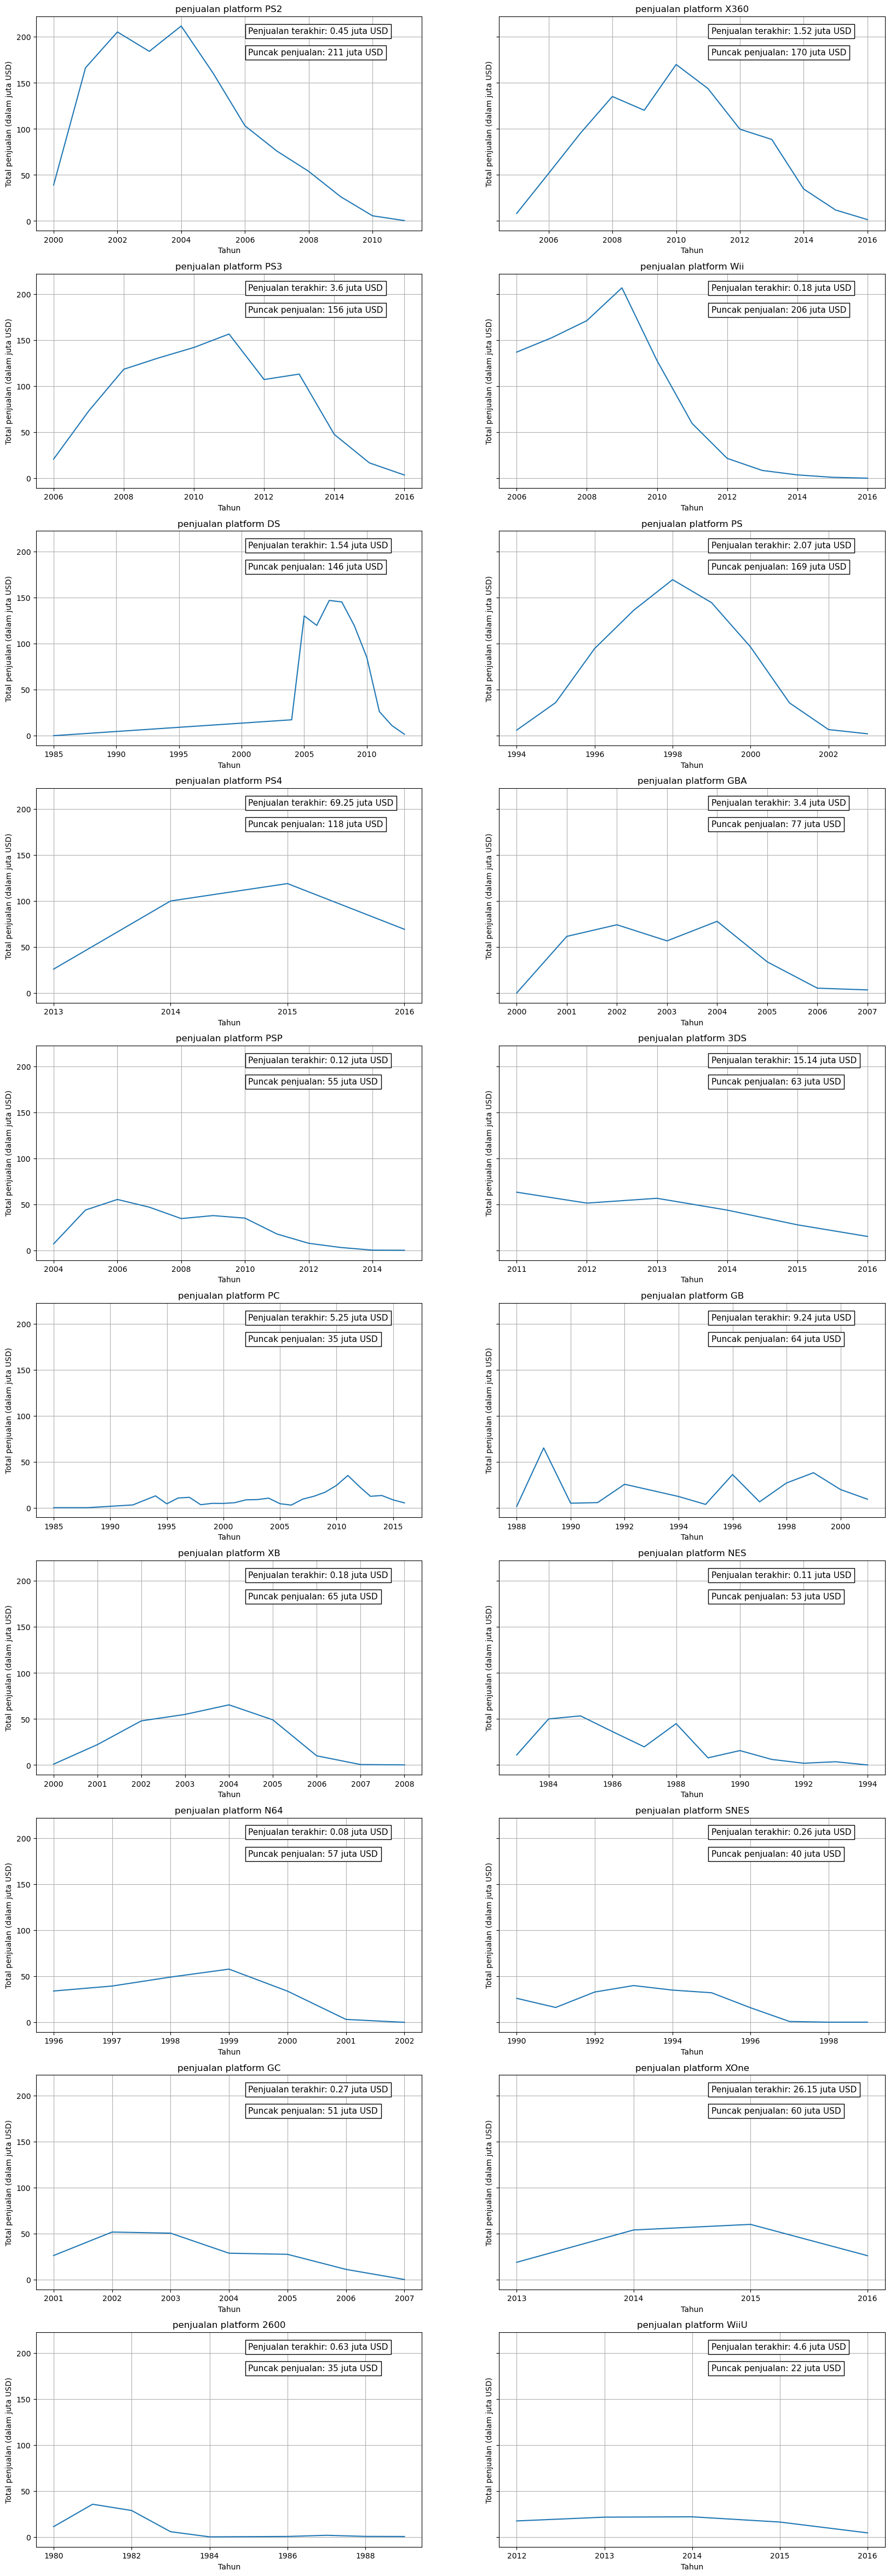

In [31]:
fig, axes = plt.subplots(10,2, figsize = (20,60), sharey=True) #sumbu y tiap kurva dibuat sama
axes = axes.reshape(-1)


for i, platform in enumerate(top_platform.index[0:20]): #pengulangan untuk index dari top_platform 
    latest_sale = game_new[game_new.platform == platform].groupby('year_of_release')['total_sales'].sum().iloc[-1] #melihat penjualan terakhir
    peak_sale = game_new[game_new.platform == platform].groupby('year_of_release')['total_sales'].sum().max()
    axes[i].plot(game_new[game_new.platform == platform].groupby('year_of_release')['total_sales'].sum())
    axes[i].set_title('penjualan platform ' + platform)
    axes[i].set_xlabel('Tahun')
    axes[i].set_ylabel('Total penjualan (dalam juta USD)')
    axes[i].grid(True)
    axes[i].annotate(xy=(0.55, 0.92), #penambahan latest_sale dalam grafik
                     text='Penjualan terakhir: ' + str(latest_sale.round(2)) + ' juta USD',
                     xycoords='axes fraction',
                     bbox = dict(facecolor='white'),
                     fontsize=11
                    )
    axes[i].annotate(xy=(0.55, 0.82),
                     text='Puncak penjualan: ' + str(int(peak_sale)) + ' juta USD',
                     xycoords='axes fraction',
                     bbox = dict(facecolor='white'),
                     fontsize=11
                    )
axes[6].set_xticks(range(2013, 2017))
axes[17].set_xticks(range(2013, 2017))
axes[19].set_xticks(range(2012, 2017))

plt.show()

Dapat terlihat bahwa pada umumnya penjualan dari suatu platform memiliki suatu siklus, yang pada awal platform tersebut rilis akan memiliki pendapatan, namun seiring berjalannya waktu, platform tersebut akan redup yang dapat terlihat dari mulai menurunnya pendapatan dari platform hingga akhirnya pendapatan tersebut nyaris nol. Hanya platform PC yang kurvanya berbeda diantara yang lain dikarenakan platform PC adalah platform yang tidak lekang oleh waktu. Artinya platform PC bukanlah plaform yang platform akan mati dikarenakan berbagai faktor seperti: perusahaan membuat platform baru, terbatasnya spesifikasi dari platform sehingga penggembang <i>game</i> berpindah ke platform lain, dll.

<b>Suatu platform akan dirasa sebagai platform yang "baru" ketika 3-5 tahun platform tersebut rilis.</b> Hal tersebut ditandakan ketika pendapatan platform tersebut berada pada puncaknya, yakni 3-5 tahun pertama platform rilis. Umumnya, <b>platform memiliki umur hidup sekitar 7-10 tahun dari awal platform tersebut rilis hingga platform tersebut tidak lagi memberikan pendapatan.</b> Contohnya adalah platform Playstation dan SNES yang telah mati beberapa tahun yang lalu. Dapat terlihat untuk platform PS-PS2-PS3, yang pada awalnya sekitar 3-5 tahun mereka berada dalam puncak pendapatannya, namun setelah itu muncul platform generasi berikutnya dan pendapatan dari platform generasi lama menjadi turun namun tidak drastis dikarenakan ada masa transisi untuk konsumen berpindah platform.

### Analisa platform yang relevan untuk tahun 2017

Dari hasil kesimpulan sebelumnya, didapat pola bahwa <b>platform dianggap "baru" ketika 3-5 tahun setelah platform rilis</b>. Dari situ, dapat diambil <b>penjualan pada tahun 2012-2016 sebagai analisa untuk memperkirakan <i>game</i> yang relevan ditahun 2017.</b> 

In [32]:
#pembuatan dictionary
relevant_platform_dict = {'platform':[], 'latest_sales':[], 'latest_year':[]}

#Looping untuk mencari penjualan tahun 2016
for platform in top_platform.index:
    latest_sales = game_new[game_new.platform == platform].groupby('year_of_release')['total_sales'].sum().iloc[-1].round(2)
    latest_year = game_new[game_new.platform == platform].groupby('year_of_release')['total_sales'].sum().index.max()
#penambahan hasil looping ke dictionary    
    relevant_platform_dict['platform'].append(platform)
    relevant_platform_dict['latest_sales'].append(latest_sales)
    relevant_platform_dict['latest_year'].append(latest_year)
#pengubahan dari dictionary ke dataframe
relevant_platform = pd.DataFrame.from_dict(relevant_platform_dict)
relevant_platform.sort_values(by=['latest_sales', 'latest_year'], ascending=False).query('latest_year == 2016')

,platform,latest_sales,latest_year
6,PS4,69.25,2016
17,XOne,26.15,2016
9,3DS,15.14,2016
10,PC,5.25,2016
19,WiiU,4.60,2016
20,PSV,4.25,2016
2,PS3,3.60,2016
1,X360,1.52,2016
3,Wii,0.18,2016


Dapat terlihat bahwa pada tahun 2016, platform dengan penjualan paling besar adalah PS4, Xbox One, 3DS, dan PC. PC adalah platform yang dianggap anomali, sehinga hanya akan dilihat 3 platform teratas. Selanjutnya akan dilihiat kinerja dari 3 platform ini

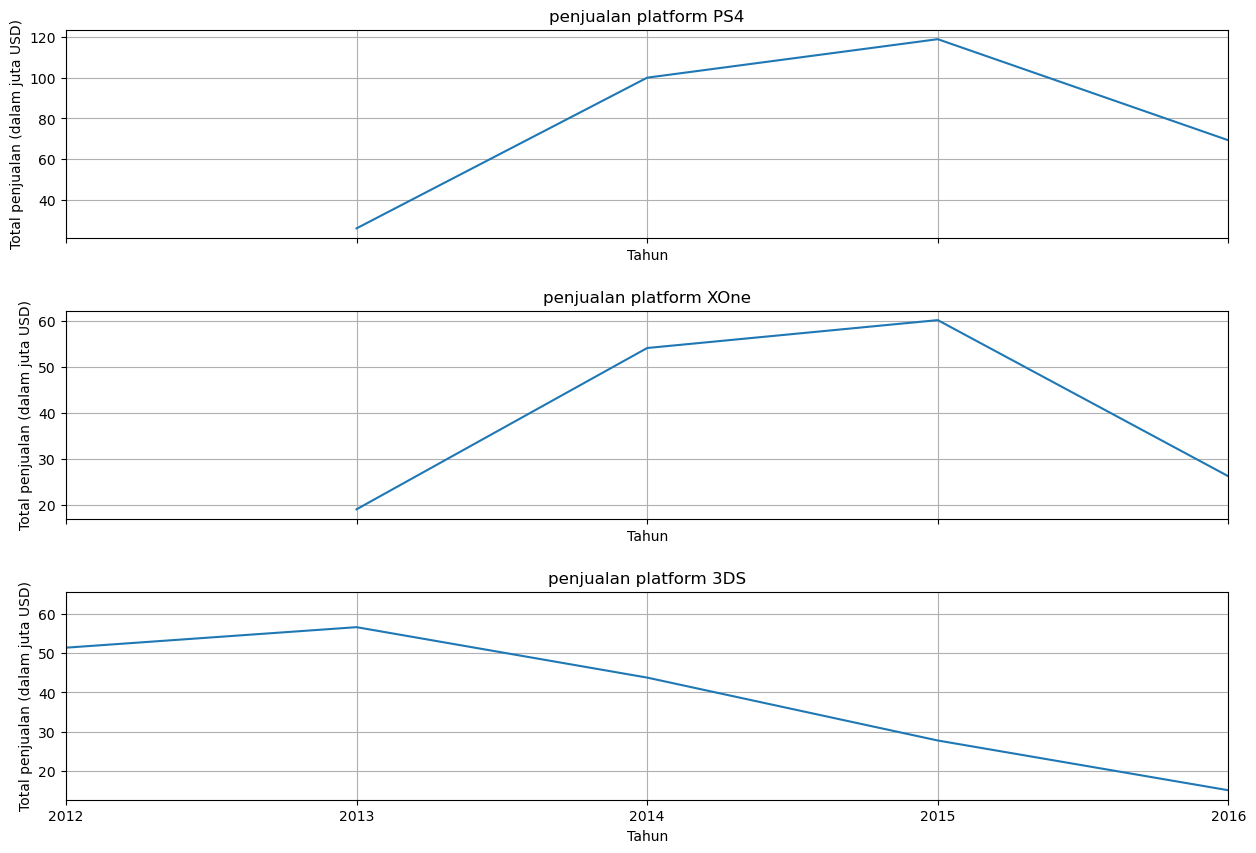

In [33]:
fig, axes = plt.subplots(3, figsize = (15,10), sharex=True) #sumbu y tiap kurva dibuat sama
plt.subplots_adjust(hspace=0.35)
axes = axes.reshape(-1)

platform_2016 = 'PS4', 'XOne', '3DS'

for i, platform in enumerate(platform_2016): #pengulangan untuk index dari top_platform 
    latest_sale = game_new[game_new.platform == platform].groupby('year_of_release')['total_sales'].sum().iloc[-1] #melihat penjualan terakhir
    peak_sale = game_new[game_new.platform == platform].groupby('year_of_release')['total_sales'].sum().max()
    axes[i].plot(game_new[game_new.platform == platform].groupby('year_of_release')['total_sales'].sum())
    axes[i].set_title('penjualan platform ' + platform)
    axes[i].set_xlabel('Tahun')
    axes[i].set_ylabel('Total penjualan (dalam juta USD)')
    axes[i].grid(True)

axes[0].set_xticks(range(2013, 2017))
axes[1].set_xticks(range(2013, 2017))
axes[2].set_xlim([2012,2016])
axes[2].set_xticks(range(2012, 2017))

plt.show()

Dari grafik dapat terlihat bahwa walaupun PS4, Xbox One, dan 3DS adalah platform dengan pendapatan terbesar pada tahun 2016, namun ketiga platform ini telah mengalami puncak pendapatan, dengan dari tahun 2015 - 2016 platform PS4 dan Xbox One mengalami penurunan pendapatan dan dari tahun 2013 - 2016 platform 3DS telah mengalami <i>downtrend</i> pendapatan yang panjang. Walaupun pendapatan platform mengalami penurunan, namun kemungkinan ketiga platform ini masih memberikan pendapatan dikarenakan umur dari ketiga platform ini kurang dari 10 tahun, yakni rata - rata dari umur platform ketika platform tidak memberikan pendapatan lagi, dan memang terjadi penurunan pendapatan untuk seluruh platform sehingga kemungkinan terdapat faktor eksternal yang memengaruhi penurunan pendapatan platform. Selain itu, terdapat kemungkinan bahwa untuk data tahun 2016 memang belum lengkap sehingga terjadi penurunan pendapatan. Untuk kurva PS4 dan Xbox One, dikarenakan kedua platform ini baru rilis di tahun 2013 maka tidak ada hasil penjualan tahun 2012.

### Penjualan seluruh platform 

Selanjutnya akan diambil data penjualan dari tahun 2013 - 2016 untuk kegiatan analisis selanjutnya. Untuk membandingkan penjualan seluruh platform dari tahun 2013 - 2016, akan digambarkan grafik <i>boxplot</i>

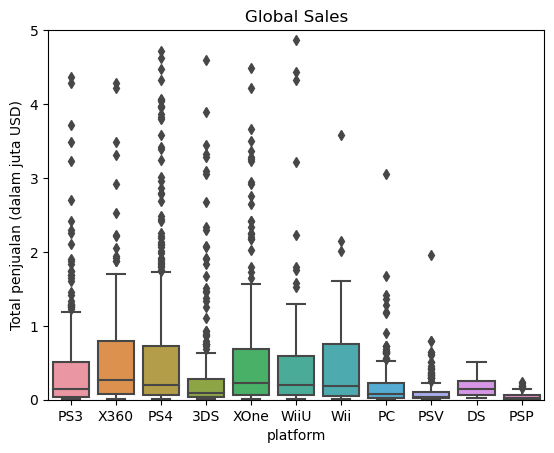

In [34]:
platform_2013 = game_new.query('year_of_release >= 2013')
ax = sns.boxplot(x='platform', y='total_sales', data=platform_2013)
ax.set_title('Global Sales')
ax.set_ylabel('Total penjualan (dalam juta USD)')
plt.ylim(0,5)

plt.show()

Dari kurva <i>boxplot</i>, dapat terlihat bahwa total penjualan terbesar berada pada platform PS4, diikuti oleh Xbox 360, Xbox One, Wii, dan Wii U. Total penjualan terkecil diraih oleh PSP dan PS Vita. Kurva <i>boxplot</i> juga memperlihatkan bahwa banyaknya whisker yang berada diatas <i>boxplot</i>, sehingga terdapat beberapa penjualan yang memberikan penjualan diatas rata - rata. 

### Pengaruh ulasan terhadap penjualan PS4

Salah satu faktor yang memengaruhi penjualan dari suatu <i>game</i> adalah ulasan yang diberikan oleh kritikus maupun pengguna lainnya. Akan dilihat pengaruh penjualan <i>game</i> pada platform PS4 terhadap ulasan yang diberikan.

In [35]:
ps4_user_score = platform_2013[platform_2013['platform'] == 'PS4'].query('user_score >= 0')
ps4_critic_score = platform_2013[platform_2013['platform'] == 'PS4'].query('critic_score >= 0')

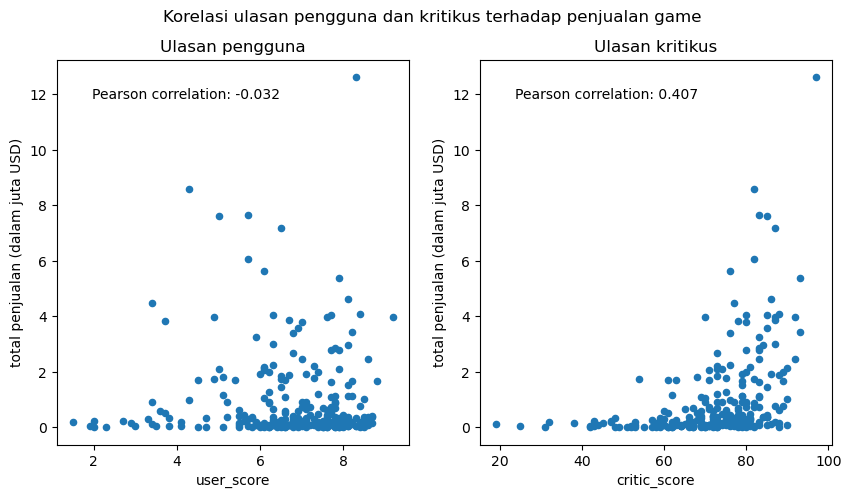

In [36]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Korelasi ulasan pengguna dan kritikus terhadap penjualan game')
ps4_user_score.plot(kind='scatter',
                    x='user_score', 
                    y='total_sales', 
                    ax=axes[0],
                    ylabel = 'total penjualan (dalam juta USD)',
                    title='Ulasan pengguna')
axes[0].annotate(xy=(0.1, 0.9),
                 text='Pearson correlation: {:.3f}'.format(ps4_user_score['user_score'].corr(ps4_user_score['total_sales'])),
                 xycoords='axes fraction',
                 fontsize=10)
ps4_critic_score.plot(kind='scatter',
                      x='critic_score',
                      y='total_sales',
                      ax=axes[1],
                      ylabel = 'total penjualan (dalam juta USD)',
                      title='Ulasan kritikus')
axes[1].annotate(xy=(0.1, 0.9),
                 text='Pearson correlation: {:.3f}'.format(ps4_critic_score['critic_score'].corr(ps4_critic_score['total_sales'])),
                 xycoords='axes fraction',
                 fontsize=10)

plt.show()

Dari grafik dan nilai koeffisien Pearson, dapat terlihat bahwa nilai koefisien korelasi ulasan pengguna terhadap jumlah penjualan adalah -0,032. Nilai ini menunjukan bahwa hampir tidak ada korelasi linear ulasan pengguna terhadap jumlah penjualan, artinya tidak ada total penjualan tidak dipengaruhi oleh ulasan pengguna. Namun, nilai koefisien korelasi ulasan kritikus terhadap penjualan adalah 0,407. Artinya terdapat pengaruh positif yang cukup kuat dari nilai krtikus terhadap penjualan dari <i>game</i>. 

### Judul <i>game</i> PS4 terhadap platform yang lain

Terdapat <i>game</i> yang rilis selain di platform PS4, sehingga perlu dilihat penjualan <i>game</i> tersebut di platform lain

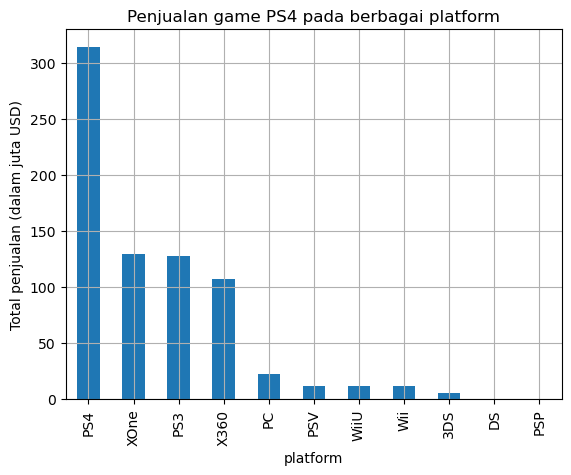

In [37]:
ps4_games = platform_2013[platform_2013['platform'] == 'PS4']['name'].unique()
ps4_games_other_platform = platform_2013[platform_2013['name'].isin(ps4_games)].groupby('platform')['total_sales'].sum().sort_values(ascending=False)
ps4_games_other_platform.plot(kind='bar',
                              x='platform',
                              y='total_sales',
                              title='Penjualan game PS4 pada berbagai platform',
                              ylabel = 'Total penjualan (dalam juta USD)',
                              grid = True) 

plt.show()

Dari grafik dapat terlihat bahwa total penjualan <i>game</i> PS4 selain pada PS4 adalah Xbox One, diikuti oleh PS3, Xbox 360, dan PC. Hal ini wajar mengingat bahwa banyak developer <i>game</i> yang membuat <i>game</i> untuk bisa dimainkan pada berbagai jenis platform, dan umumnya developer <i>game</i> menjaga 1 generasi dibawah generasi platform terbaru agar tetap bisa memainkan sebagian <i>game</i> yang baru.

### Distribusi <i>game</i> berdasarkan genre

Selanjutnya akan dicari distribusi <i>game</i> berdasarkan genre umum dari <i>game</i> tersebut dan dilihat penjualannya.

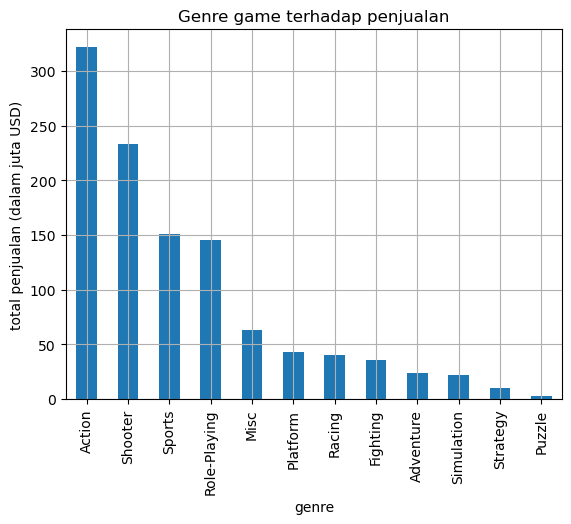

In [38]:
genre_sales = platform_2013.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind = 'bar',
                 x='genre',
                 y='total_sales',
                 grid=True,
                 title='Genre game terhadap penjualan',
                 ylabel = 'total penjualan (dalam juta USD)')

plt.show()

Dapat terlihat bahwa secara umum, penjualan untuk <i>game</i> dengan genre Action memberikan penjualan terbaik, dilanjutkan oleh genre Shooter dan Sports. Sedangkan penjualan genre <i>game</i> Puzzle memberikan total pendapatan terendah, dilanjutkan oleh Strategy dan Simulation.

### Kesimpulan Sementara

Dari proses analisa, didapat berbagai kesimpulan, yakni:
- Tahun 2009 adalah puncak produksi <i>game</i> terbanyak, setelah itu hingga tahun 2016 jumlah <i>game</i> yang rilis di pasar mengalami penurunan
- Umumnya, suatu platform dianggap "baru" 3-5 tahun setelah platform tersebut rilis, dan butuh waktu 7 - 10 tahun hingga suatu platform tidak memberikan keuntungan kembali
- Untuk tahun 2017, platform yang dianggap memberikan keuntungan adalah PS4, Xbox One, dan 3DS
- Dari tahun 2013 hingga tahun 2016, platform PS4 memberikan pendapatan terbesar, diikuti oleh Xbox 360, Xbox One, dan Wii. Sedangkan PSP dan PS Vita memberikan pendapatan terkecil
- Hampir tidak ada korelasi yang signifikan antara ulasan pengguna dengan total pendapatan <i>game</i> PS4, namun terdapat korelasi positif cukup kuat antara ulasan kritikus dengan total pendapatan <i>game</i> PS4.
- Terdapatan penjualan <i>game</i> PS4 pada platform lain, dengan Xbox One adalah platform diluar PS4 yang memberikan jumlah pendapatan terbesar untuk <i>game</i> PS4, diikuti oleh PS3 dan Xbox 360
- <i>Game</i> dengan genre Action memberikan pendapatan terbesar pada tahun 2012 - 2016, diikuti oleh Shooter dan Sports. Sedangkan Puzzle adalah genre <i>game</i> yang memberikan pendapatan terkecil, diikuti oleh Strategy dan Simulation

## Pemrofilan pengguna tiap wilayah

Selanjutnya dilakukan pemrofilan untuk tiap - tiap wilayah penjualan <i>game</i>, yakni NA, EU, dan JP. Pemrofilan ini akan melihat
- Platform terlaris
- Genre terlaris
- Pengaruh ESRB terhadap penjualan

### Platform terlaris per wilayah

In [39]:
game_na = platform_2013.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
game_eu = platform_2013.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
game_jp = platform_2013.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

In [40]:
#platform terlaris untuk wilayah NA
game_na.head()

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

In [41]:
#platform terlaris untuk wilayah EU
game_eu.head()

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

In [42]:
#platform terlaris untuk wilayah JP
game_jp.head()

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

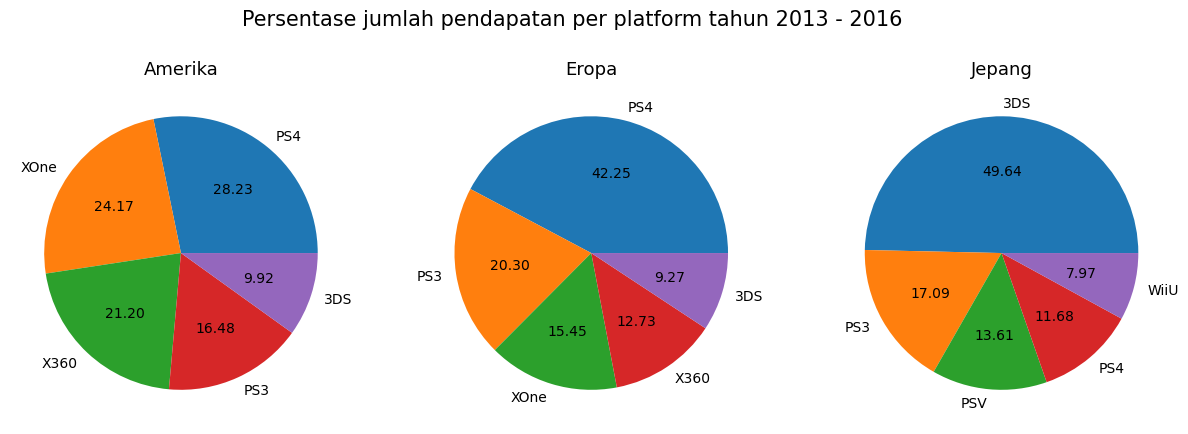

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
fig.suptitle('Persentase jumlah pendapatan per platform tahun 2013 - 2016', y=.8, fontsize=15)

axes[0].pie(game_na.head(), labels=game_na.head().index, autopct='%.2f')
axes[0].set_title('Amerika', fontsize=13)

axes[1].pie(game_eu.head(), labels=game_eu.head().index, autopct='%.2f')
axes[1].set_title('Eropa', fontsize=13)

axes[2].pie(game_jp.head(), labels=game_jp.head().index, autopct='%.2f')
axes[2].set_title('Jepang', fontsize=13)

plt.show()

Dari data, dapat terlihat bahwa <b>PS4 mendominasi wilayah NA dan EU, sementara 3DS mendominasi wilayah JP.</b> Hal yang membedakan lainnya adalah platform Xbox One dan Xbox 360 adalah platform yang mendominasi NA setelah PS4, PS3 dan Xbox One adalah platform yang mendominasi setelah PS4 untuk region EU, dan PS3 dan PS Vita adalah platform yang mendominasi setelah 3DS untuk wilayah JP. 

### Genre terlaris per wilayah

In [44]:
genre_na = platform_2013.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
genre_eu = platform_2013.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
genre_jp = platform_2013.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

In [45]:
genre_na.head()

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

In [46]:
genre_eu.head()

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

In [47]:
genre_jp.head()

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

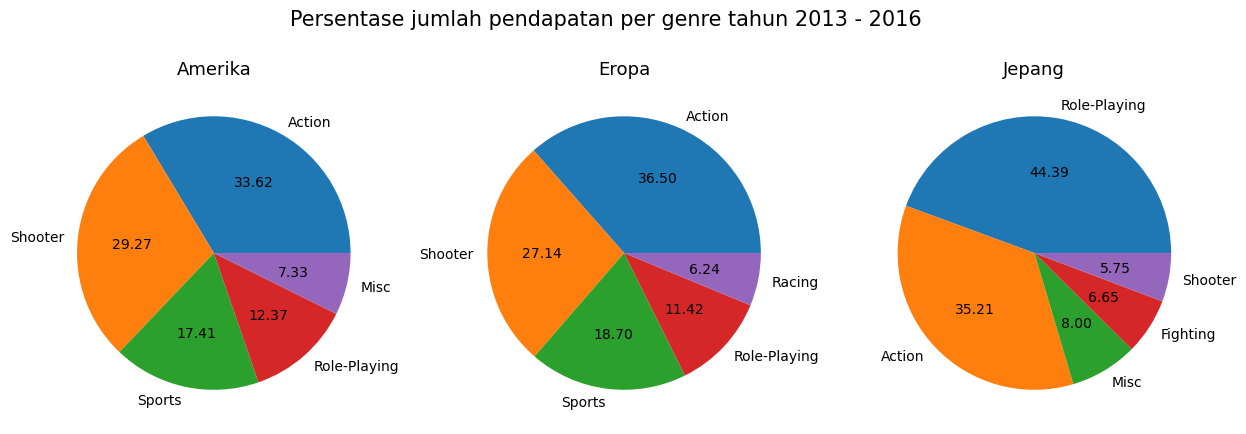

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
fig.suptitle('Persentase jumlah pendapatan per genre tahun 2013 - 2016', y=.8, fontsize=15)

axes[0].pie(genre_na.head(), labels=genre_na.head().index, autopct='%.2f')
axes[0].set_title('Amerika', fontsize=13)

axes[1].pie(genre_eu.head(), labels=genre_eu.head().index, autopct='%.2f')
axes[1].set_title('Eropa', fontsize=13)

axes[2].pie(genre_jp.head(), labels=genre_jp.head().index, autopct='%.2f')
axes[2].set_title('Jepang', fontsize=13)

plt.show()

Dari grafik diatas, diperoleh hasil bahwa untuk region NA dan EU, <b>genre Action mendominasi penjualan <i>game</i></b>, diikuti oleh genre Shooter dan Sports. Untuk region JP, , <b>genre Role-playing mendominasi penjualan <i>game</i></b>, diikuti oleh genre Action dan genre yang lainnya.

### Pengaruh ESRB terhadap penjualan

In [49]:
esrb_na = platform_2013.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_eu = platform_2013.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_jp = platform_2013.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

In [50]:
esrb_na.head()

rating
M       165.21
N/A      89.42
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64

In [51]:
esrb_eu.head()

rating
M       145.32
E        83.36
N/A      78.91
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64

In [52]:
esrb_jp.head()

rating
N/A     85.05
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64

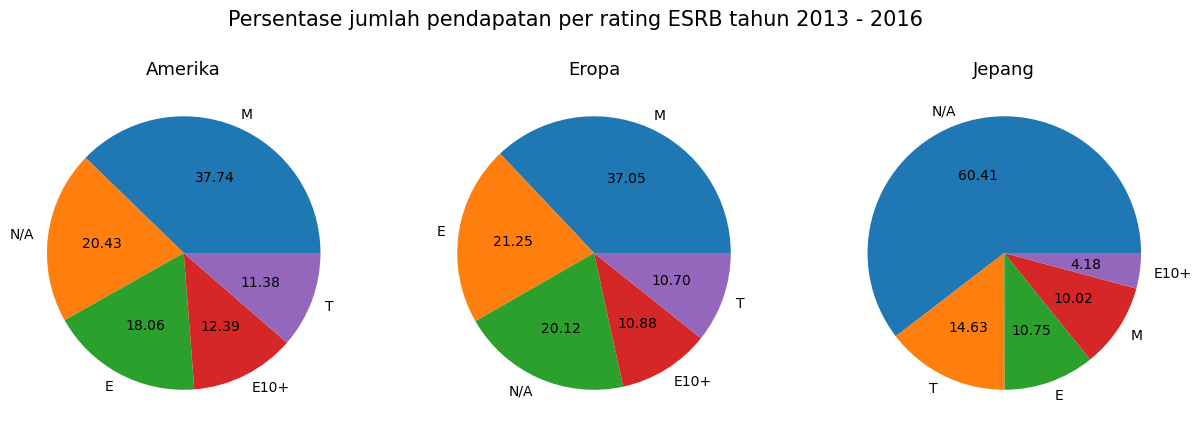

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
fig.suptitle('Persentase jumlah pendapatan per rating ESRB tahun 2013 - 2016', y=.8, fontsize=15)

axes[0].pie(esrb_na.head(), labels=esrb_na.head().index, autopct='%.2f')
axes[0].set_title('Amerika', fontsize=13)

axes[1].pie(esrb_eu.head(), labels=esrb_eu.head().index, autopct='%.2f')
axes[1].set_title('Eropa', fontsize=13)

axes[2].pie(esrb_jp.head(), labels=esrb_jp.head().index, autopct='%.2f')
axes[2].set_title('Jepang', fontsize=13)

plt.show()

Dari grafik dapat terlihat bahwa <b>rating Mature (<i>game</i> untuk usia 17 tahun keatas) mendominasi penjualan untuk wilayah NA dan EU. Untuk region JP, tidak bisa diketahui rating apa yang mendominasi penjualan.</b> Untuk region JP, hal ini wajar mengingat bahwa ESRB adalah rating yang diberikan oleh NA untuk <i>game</i> yang masuk ke wilayah NA, namun untuk wilayah JP, tidak sedikit <i>game</i> yang eksklusif dijual di wilayah JP saja

## Menguji Hipotesis

Selanjutnya akan dilakukan pengujian hipotesis, terdapat 2 hipotesis yang akan diuji
- Rata - rata rating pengguna platform Xbox One dan PC adalah sama
- Rata - rata rating pengguna genre Action dan sports berbeda

### Perbedaan rating pengguna platform Xbox One dan PC

Dari hipotesis diatas, hipotesis nol dan alternatifnya adalah:
- H0(hipotesis nol): rata - rata rating pengguna platform Xbox One dan PC adalah sama
- H1(hipotesis alternatif): rata - rata rating pengguna platform Xbox One dan PC tidak sama

Selanjutnya akan dibuat dataset baru yang memilah platform serta rating pengguna yang tidak terisi (sebelumnya telah dilakukan pengisian untuk rating pengguna -1 bagi nilai yang hilang)

In [54]:
xone_2013 = platform_2013[platform_2013['platform'] == 'XOne'].query('user_score >= 0')
pc_2013 = platform_2013[platform_2013['platform'] == 'PC'].query('user_score >= 0')
xone_2013.shape, pc_2013.shape

((182, 12), (155, 12))

Terdapat 187 game untuk Xbox One dan 155 game untuk PC yang rilis diatas tahun 2013. Dikarenakan terdapat lebih dari 50 data, maka kita dapat menguji hipotesis

In [55]:
xone_2013['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [56]:
pc_2013['user_score'].describe()

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Dapat terlihat bahwa rating pengguna untuk platform Xbox One adalah 6,52 dan untuk PC adalah 6,27. Ada perbedaan sekitar 5% dari nilai, namun perlu dilakukan uji lebih lanjut untuk membuktikan hipotesis. Pertama dilakukan perhitungan varians dari kedua data.

In [57]:
np.var(xone_2013['user_score']), np.var(pc_2013['user_score'])

(1.8965188383045533, 3.0163063475546332)

Varians untuk rating pengguna dari platform Xbox One adalah 1,90 dan untuk platform PC adalah 3,01. Dikare berbeda sekitar 40%, namun kedua data ini tidak berbeda jauh secara signifikian

In [58]:
alpha = 0.05 
#nilai alpha adalah 0,05 yang menunjukan interval kepercayaan 95%. Memilih alpha 0,05 dikarenakan umumnya untuk menguji level kepercayaan pada nilai 95%
results = st.ttest_ind(xone_2013['user_score'], pc_2013['user_score'],
                      equal_var=False) #penggunaan equal var yang False karena perbedaan varians yang signifikan
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
    print('Kita menolak hipotesis nol')
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  0.14759594013430463
Kita tidak dapat menolak hipotesis nol


Dari hasil t-test diperoleh bahwa nilai p lebih besar dibandingkan dengan nilai batas ambang kepercayaan 0,05, Sehingga dipilih hipotesis nol, yakni <b>rata - rata rating pengguna platform Xbox One dan PC adalah SAMA</b>.

### Perbedaan rating pengguna genre Action dan Sports

Dari hipotesis diatas, dapat diambil hipotesis nol dan hipotesis alternatif sebagai berikut:
- H0(hipotesis nol): Rata - rata rating pengguna genre Action dan Sports adalah sama
- H1(hipotesis alternatif): Rata - rata rating pengguna genre Action dan Sports tidak sama

In [59]:
action_2013 = platform_2013[platform_2013['genre'] == 'Action'].query('user_score>=0')
sports_2013 = platform_2013[platform_2013['genre'] == 'Sports'].query('user_score>=0')
action_2013.shape, sports_2013.shape

((389, 12), (160, 12))

Terdapat 390 game yang memiliki genre Action dan 160 game yang memiliki genre Sports. Walaupun terdapat perbedaan data, namun data diatas lebih dari 50 data, sehingga kita bisa menguji hipotesis

In [60]:
action_2013['user_score'].describe()

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [61]:
sports_2013['user_score'].describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

Dapat dilihat bahwa rata - rata rating pengguna untuk genre Action adalah 6,84 dan untuk genre Sports adalah 5,24. Selanjutnya akan dilihat varians dari kedua data ini

In [62]:
np.var(action_2013['user_score']),np.var(sports_2013['user_score'])

(1.764812418633236, 3.1607339843749975)

Varians untuk rating pengguna untuk genre action adalah 1,76 dan untuk genre sports adalah 3,16. Terdapat perbedaan nilai varians sekitar 50%. Perbedaan nilai yang cukup signifikan ini disebabkan karena varians adalah kuadrat dari standar deviasi. Dapat dilihat sebelumnya bahwa standar deviasi rating pengguna untuk genre action adalah 1,33 dan untuk genre sports adalah 1,78. Walaupun terlihat kecil namun ketika nilai ini dikuadratkan maka perbedaannya akan terasa signifikan.

In [63]:
alpha = 0.05 
#nilai alpha adalah 0,05 yang menunjukan interval kepercayaan 95%. Memilih alpha 0,05 dikarenakan umumnya untuk menguji level kepercayaan pada nilai 95%
results = st.ttest_ind(action_2013['user_score'], sports_2013['user_score'],
                      equal_var=False) #penggunaan equal var yang False karena perbedaan varians yang signifikan
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
    print('Kita menolak hipotesis nol')
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  1.4460039700704315e-20
Kita menolak hipotesis nol


Dari hasil t-test dapat dilhat bahwa nilai p jauh lebih kecil dibandingkan dengan nilai batas ambang kepercayaan 0,05. Sehingga diambil hipotesis alternatif yakni <b>Rata - rata rating pengguna genre Action dan Sports BERBEDA</b>, dengan rata - rata untuk rating pengguna genre Action adalah 6,84 dan untuk genre Sports adalah 5,24.

## Kesimpulan

Telah banyak kegiatan yang dilakukan pada analisa ini, dengan kesimpulan yang diperoleh adalah sebagai berikut:
- Dalam dataset `game`, terdapat beberapa data yang menggandung nilai yang hilang seperti pada `user_score`, `rating`, `critic_score`, dll. Nilai - nilai yang hilang ini bersifat acak atau tidak memiliki pola sehingga kemungkinan terdapat kesalahan saat menginput data, kurangnya data dari sumber, dll.
- Dilakukan pemrosesan data seperti mengubah nama kolom, mengatasi nilai yang hilang, menghilangkan nilai yang mengandung duplikat, dan mengubah tipe data
- Dari hasil analisa data diperoleh beberapa kesimpulan, yakni: jumlah game yang diproduksi mengalami puncak pada tahun 2009 dan pada tahun 2016 mengalami penurunan, umur platform hingga platform tidak memberikan pendapatan sekitar 8-10 tahun dengan 3-5 tahun merupakan puncak pendapatan platform, platform yang dianggap relevan pada tahun 2016 adalah PS4, Xbox One, dan 3DS, tidak ada korelasi signifikan antara rating pengguna dengan total pendapatan namun terdapat korelasi positif yang cukup kuat antara rating kritikus dengan total pendapatan, serta genre terpopuler adalah Action diikuti oleh Shooter dan Sports
- Dari hasil pemrofilan pengguna per wilayah didapat hasil: Untuk wilayah NA dan EU, platform terlaris adalah PS4 sedangkan untuk wilayah JP adalah 3DS, genre teratas untuk wilayah NA dan EU adalah action dan untuk wilayah JP adalah Role-Playing, dan rating game teratas untuk wilayah NA dan EU adalah Mature namun untuk JP tidak diketahui rating game teratas
- Pengujian hipotesis menunjukan bahwa rata - rata ulasan pengguna Xbox One dan PC adalah sama dan rata - rata ulasan pengguna genre Action dan Sports berbeda

Untuk toko daring "Ice", game yang diprediksi berhasil di tahun 2017 adalah:
- Berada pada platform PS4, Xbox One, atau 3DS
- Memiliki ulasan dari kritikus yang cukup tinggi
- Memiliki genre Action, Shooter, Sports
- Khusus untuk pengguna wilayah JP genre yang populer adalah Role-Playing
- Rating game adalah Mature untuk wilayah EU dan NA